**Analysis of wave height along italian coasts**  
This script performs an API call to the Copernicus Marine Server and fetches data for the months of Jan and Feb 2021 around the coasts of Italy.  
The fetched data is then saved into a pandas DataFrame. 
Descriptive statistics are calculated and basic relationship between variables explored. 

*Product identifier:* MEDSEA_MULTIYEAR_WAV_006_012  
*Product name:* Mediterranean Sea Waves Reanalysis  
*Dataset:* cmems_mod_med_wav_myint_4.2km_PT1H-i   

**Variables**:
- Sea surface wave significant height [VHM0]
- Sea surface primary swell wave significant height [VHM0_SW1]
- Sea surface secondary swell wave significant height [VHM0_SW2]
- Sea surface wind wave significant height [VHM0_WW]


In [36]:
# Import modules
import copernicus_marine_client as copernicus_marine
import xarray as xr 
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
username = ""
password = ""

# Load client credentials from a JSON file
with open('config.json','r') as config_file:
    config = json.load(config_file)
    username = config["CopernicusMarine"]['username']
    password = config["CopernicusMarine"]['password']
    print("Config file read")


Config file read


In [45]:
# Load dataframe
request_dataframe = copernicus_marine.read_dataframe(
    dataset_id = "cmems_mod_med_wav_myint_4.2km_PT1H-i",
    username=username,
    password=password,
    minimum_longitude = 7.3127958575960506,                         # West Italy
    maximum_longitude = 18.99235157323233,                          # East Italy
    minimum_latitude = 36.51998113712651,                           # South Italy
    maximum_latitude = 45.43607054504527,                           # North Italy
    variables = ["VHM0", "VHM0_SW1", "VHM0_SW2", "VHM0_WW"],
    start_datetime = "2021-01-01T00:00:00",
    end_datetime = "2021-02-28T23:00:00"
)

# Print loaded dataset information
print(request_dataframe)
# drop NAs
request_dataframe = request_dataframe.dropna()

INFO - 2023-12-12T17:47:07Z - Selected dataset version is "202112"
                                VHM0  VHM0_SW1  VHM0_SW2  VHM0_WW
time       latitude  longitude                                   
2021-07-01 36.520832 7.333334    NaN       NaN       NaN      NaN
                     7.375001    NaN       NaN       NaN      NaN
                     7.416667    NaN       NaN       NaN      NaN
                     7.458334    NaN       NaN       NaN      NaN
                     7.500001    NaN       NaN       NaN      NaN
...                              ...       ...       ...      ...
           45.395832 18.791668   NaN       NaN       NaN      NaN
                     18.833334   NaN       NaN       NaN      NaN
                     18.875002   NaN       NaN       NaN      NaN
                     18.916668   NaN       NaN       NaN      NaN
                     18.958334   NaN       NaN       NaN      NaN

[59920 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


In [47]:
# Rename file for ease
wave_df = request_dataframe

# calculate statistics
print(wave_df.describe())

               VHM0      VHM0_SW1      VHM0_SW2       VHM0_WW
count  37264.000000  37264.000000  37264.000000  37264.000000
mean       0.841798      0.583605      0.180598      0.404159
std        0.479882      0.361445      0.113268      0.459810
min        0.013000      0.009000      0.000000      0.000000
25%        0.527000      0.344000      0.096000      0.105000
50%        0.655000      0.450000      0.172000      0.239000
75%        1.057250      0.748000      0.243000      0.516000
max        2.493000      1.893000      0.903000      2.414000


<AxesSubplot:xlabel='VHM0_WW', ylabel='Count'>

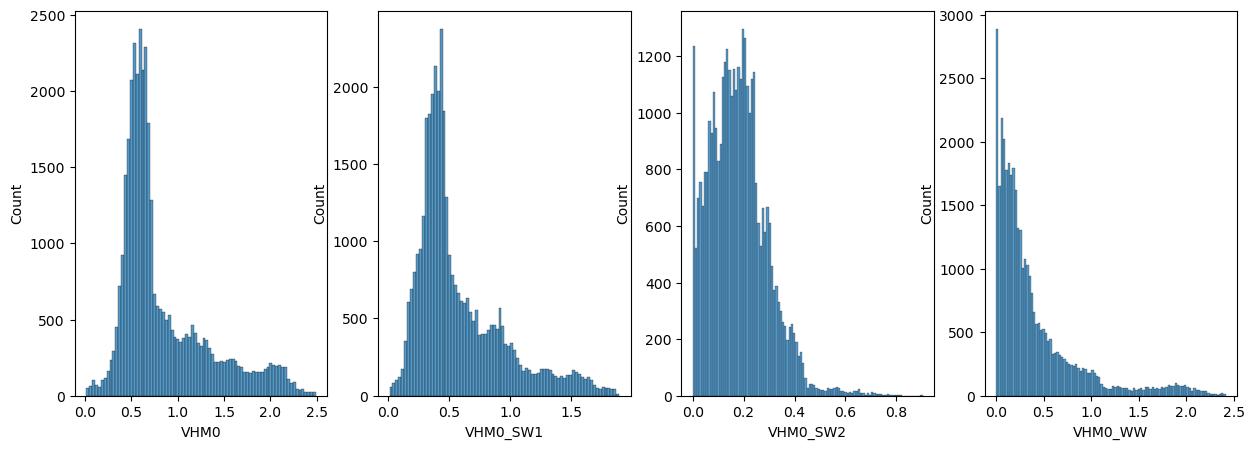

In [48]:
fig, ax = plt.subplots(1,4,figsize=(15,5))
sns.histplot(x='VHM0',data=wave_df,ax=ax[0])
sns.histplot(x='VHM0_SW1',data = wave_df, ax=ax[1])
sns.histplot(x='VHM0_SW2',data = wave_df, ax=ax[2])
sns.histplot(x='VHM0_WW',data = wave_df, ax=ax[3])

In [49]:
print(wave_df.index)

# reset indices into columns
wave_df = wave_df.reset_index(level='latitude')
print(wave_df)

MultiIndex([('2021-07-01', 36.52083206176758, 10.875000953674316),
            ('2021-07-01', 36.52083206176758, 10.916667938232422),
            ('2021-07-01', 36.52083206176758, 10.958333969116211),
            ('2021-07-01', 36.52083206176758, 11.000000953674316),
            ('2021-07-01', 36.52083206176758, 11.041667938232422),
            ('2021-07-01', 36.52083206176758, 11.083333969116211),
            ('2021-07-01', 36.52083206176758, 11.125000953674316),
            ('2021-07-01', 36.52083206176758, 11.166667938232422),
            ('2021-07-01', 36.52083206176758, 11.208333969116211),
            ('2021-07-01', 36.52083206176758, 11.250000953674316),
            ...
            ('2021-07-01', 45.39583206176758, 13.125000953674316),
            ('2021-07-01', 45.39583206176758, 13.166667938232422),
            ('2021-07-01', 45.39583206176758, 13.208333969116211),
            ('2021-07-01', 45.39583206176758, 13.250000953674316),
            ('2021-07-01', 45.39583206176758, 

In [51]:

# add  newcolumn with rounded latitudes 
wave_df['rounded_latitude']= wave_df['latitude'].round()
print(wave_df)

                       latitude   VHM0  VHM0_SW1  VHM0_SW2  VHM0_WW  \
time       longitude                                                  
2021-07-01 10.875001  36.520832  0.382     0.307     0.146    0.172   
           10.916668  36.520832  0.414     0.310     0.160    0.221   
           10.958334  36.520832  0.443     0.312     0.166    0.265   
           11.000001  36.520832  0.466     0.314     0.165    0.299   
           11.041668  36.520832  0.478     0.316     0.145    0.312   
...                         ...    ...       ...       ...      ...   
           13.333334  45.395832  0.475     0.474     0.003    0.032   
           13.375001  45.395832  0.470     0.422     0.204    0.032   
           13.416668  45.395832  0.462     0.320     0.269    0.030   
           13.458334  45.395832  0.448     0.385     0.145    0.026   
           13.500001  45.395832  0.430     0.410     0.129    0.017   

                      rounded_latitude  
time       longitude               

In [55]:
# group by (rounded) latitude
mean_wave_height_by_latitude = wave_df.groupby('rounded_latitude')['VHM0'].mean().reset_index()
sorted_wave_h_desc = mean_wave_height_by_latitude.sort_values(by='rounded_latitude',ascending=False)
print(sorted_wave_h_desc)

   rounded_latitude      VHM0
8              45.0  0.609528
7              44.0  0.999804
6              43.0  1.074150
5              42.0  1.011124
4              41.0  1.210410
3              40.0  0.787132
2              39.0  0.658368
1              38.0  0.685435
0              37.0  0.616861


[Text(0.5, 1.0, 'Latitudes by mean wave in meters')]

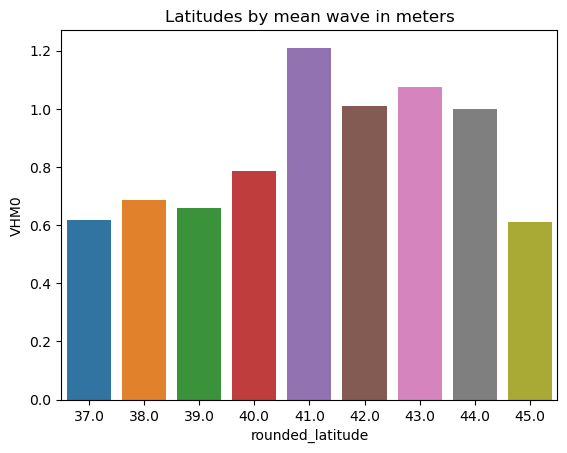

In [60]:
# create plot
sns.barplot(x='rounded_latitude',y='VHM0',data=sorted_wave_h_desc).set(title='Latitudes by mean wave in meters')